Importing Libraries

In [13]:
# HR Employee Attrition Predictor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphviz
import seaborn as sns
import sklearn.metrics as metrics
import plotly.graph_objs as go

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.compose import ColumnTransformer, make_column_transformer
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

Graphing ROC Curve

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [14]:
def graphROCCurve(y_test, y_pred):    
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label="Yes")
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Graphing important features for Random Forest Classifier

In [15]:
def graphFeaturesImportant(rf_classifier, features):
    trace = go.Scatter(
        y = features, 
        x = dataset.columns.values, mode = "markers",
        marker = dict(
            sizemode = "diameter", sizeref=1, size=13, 
            color=features, colorscale="Portland",
            showscale=True
        ),
        text = dataset.columns.values
    )
    data = [trace]

    layout = go.Layout(
        autosize = True,
        title = "Random Forest Feature Importance",
        hovermode = "closest",
        xaxis = dict(
            ticklen=5, showgrid=True, zeroline=True, showline=True
        ),
        yaxis = dict(
            title="Feature Importance", showgrid=True, zeroline=True,
            ticklen=5, gridwidth=2
        ),
        showlegend=False
    )
    
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

Defining the Neural Network Model

In [16]:
# developing the Multi Layer Perceptron Neural Network
def creatingNeuralNetworkPredictor(X_train, y_train, X_test, y_test, preprocess):
    print("\nNeural Network Classifier Section")
    print("---------------------------------")
    
    # initialize the Multi Layer Perceptron Neural Network 
    mlp_classifier = MLPClassifier(solver="adam", alpha=1e-5, max_iter=500,
                               hidden_layer_sizes=(13, 13, 13))
    
    # hook up the preprocess step with the classifier params and create the pipeline
    model = make_pipeline(preprocess, mlp_classifier)
    
    # fitting the Multi Layer Perceptron to the training set
    model.fit(X_train, y_train)
    
    print("Training set Score: ", model.score(X_train, y_train))
    print("Testing set Score: ", model.score(X_test, y_test))    
    
    return model

Defining the Random Forest Classifier

In [17]:
# developing the Random Forest Classifier
def creatingRandomForestPredictor(X_train, y_train, X_test, y_test, preprocess):
    print("\nRandom Forest Classifier Section")
    print("---------------------------------")
    
    # initialize the Multi Layer Perceptron Neural Network 
    random_forest_classifier = RandomForestClassifier(**{'n_jobs': -1,
        'n_estimators': 800,
        'warm_start': True, 
        'max_features': 0.3,
        'max_depth': 9,
        'min_samples_leaf': 2,
        'max_features' : 'sqrt',
        'random_state' : 0,
        'verbose': 0
                                                      })
    
    # hook up the preprocess step with the classifier params and create the pipeline
    model = make_pipeline(preprocess, random_forest_classifier)
    
    # fitting Random Forest to the training set
    model.fit(X_train, y_train)
    
    print("Training set Score: ", model.score(X_train, y_train))
    print("Testing set Score: ", model.score(X_test, y_test))    
    
    return model

Setting up preprocess steps using Pipeline

In [18]:
# using ColumnTransformer only approach
transformed_data = dataset.loc[:, dataset.columns != "Attrition"]
X = transformed_data.values
y = dataset.Attrition.values

numerical_features = transformed_data.dtypes == "int64"
categorical_features = ~numerical_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

preprocess = make_column_transformer(
    (categorical_features, OneHotEncoder()),
    (numerical_features, make_pipeline(SimpleImputer(), StandardScaler()))
)

/anaconda/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning:

`make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.



Importing the data

In [19]:
# importing the data
dataset = pd.read_csv("./data/employee_attrition.csv")
dataset = dataset.drop(["YearsWithCurrManager"], axis=1)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,3,1,80,0,8,0,1,6,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,4,80,1,10,3,3,10,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,80,0,7,3,3,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,80,0,8,3,3,8,7,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,4,80,1,6,3,3,2,2,2


Analyzing the Data

In [20]:
# outputting data summary
print("Summary Info About the Dataset")
print("Does category contain null values?")
print(dataset.isnull().any(), "\n")
print("Said Yes to Attrition: ", y[(y == 1)].size)
print("Said No to Attrition:  ", y[(y == 0)].size)
print("Total responses:       ", y.size)

Summary Info About the Dataset
Does category contain null values?
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel

Training and Testing the Model

In [32]:
model = creatingNeuralNetworkPredictor(X_train, y_train, X_test, y_test, preprocess)


Neural Network Classifier Section
---------------------------------
Training set Score:  1.0
Testing set Score:  0.8435374149659864


Analyzing the Neural Network Model - Accuracy

In [33]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# output results
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy Score of Prediction : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report")
print(metrics.classification_report(y_test, y_pred))
print("Zero One Loss: ", metrics.zero_one_loss(y_test, y_pred))
print("Log Loss:      ", metrics.log_loss(y_test, y_pred_prob))

Accuracy Score of Prediction :  84.35374149659864

Classification Report
              precision    recall  f1-score   support

          No       0.88      0.93      0.91       362
         Yes       0.58      0.44      0.50        79

    accuracy                           0.84       441
   macro avg       0.73      0.69      0.71       441
weighted avg       0.83      0.84      0.83       441

Zero One Loss:  0.15646258503401356
Log Loss:       1.7547813967770651


Analyzing the Neural Network Model - ROC Curve

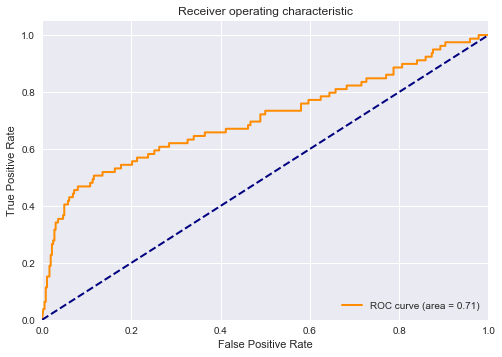

ROC AUC Score:  0.7057661374921324


In [34]:
graphROCCurve(y_test, y_pred_prob)
print("ROC AUC Score: ", metrics.roc_auc_score(y_test, y_pred_prob, average="micro"))

Analyzing the Neural Network Model - Confusion Matrix

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62


Confusion Matrix
Predicted   No  Yes  All
True                    
No         337   25  362
Yes         44   35   79
All        381   60  441


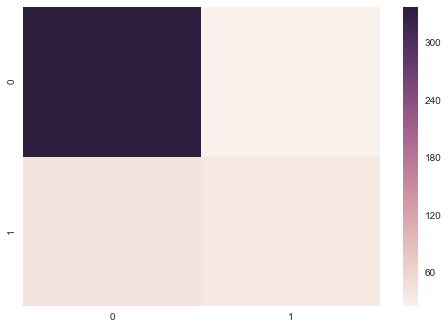

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm)
print("\nConfusion Matrix")
print(pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['True'], colnames=['Predicted'], margins=True))
plt.show()

Training and Testing the Model

In [26]:
model = creatingRandomForestPredictor(X_train, y_train, X_test, y_test, preprocess)


Random Forest Classifier Section
---------------------------------
Training set Score:  0.9436345966958212
Testing set Score:  0.8390022675736961


Analyzing the Random Forest Model - Accuracy

In [29]:

# Predicting the Test set results
y_pred = model.predict(X_test)

# output results
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("Accuracy Score of Prediction : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report")
print(metrics.classification_report(y_test, y_pred))
print("Zero One Loss: ", metrics.zero_one_loss(y_test, y_pred))
print("Log Loss:      ", metrics.log_loss(y_test, y_pred_prob))

Accuracy Score of Prediction :  83.90022675736961

Classification Report
              precision    recall  f1-score   support

          No       0.84      0.99      0.91       362
         Yes       0.83      0.13      0.22        79

    accuracy                           0.84       441
   macro avg       0.84      0.56      0.57       441
weighted avg       0.84      0.84      0.79       441

Zero One Loss:  0.16099773242630389
Log Loss:       0.37285537701913585


Analyzing the Random Forest Model - ROC Curve

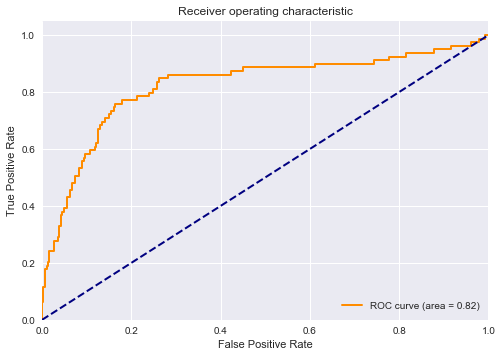

ROC AUC Score:  0.8223302328834184


In [30]:
graphROCCurve(y_test, y_pred_prob)
print("ROC AUC Score: ", metrics.roc_auc_score(y_test, y_pred_prob, average="micro"))

Analyzing the Random Forest Model - Confusion Matrix


Confusion Matrix
Predicted   No  Yes  All
True                    
No         360    2  362
Yes         69   10   79
All        429   12  441


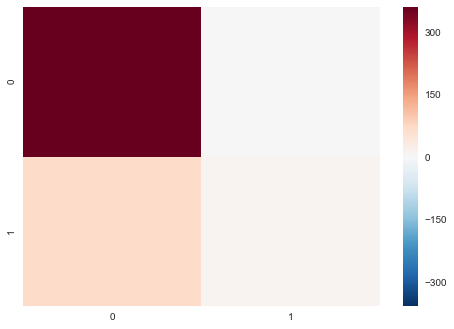

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
print(pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['True'], colnames=['Predicted'], margins=True))
sns.heatmap(cm, center=True)
graphFeaturesImportant(model, model.steps[1][1].feature_importances_)
plt.show()